In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [55]:
#charger l'ensemble de données
df=pd.read_csv('loan_data.csv',sep=',')
#Analyse exploratoir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [56]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [57]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [58]:
len(df)

9578

In [59]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [60]:

# Using pandas' get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=['purpose'], prefix='purpose')

df_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [61]:
df_encoded['purpose_educational'].unique()

array([0, 1], dtype=uint8)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [63]:
df_encodedX = df_encoded[['credit.policy', 'int.rate','installment',
                          'log.annual.inc','dti','fico','days.with.cr.line',
                          'revol.bal','revol.util','inq.last.6mths',	'delinq.2yrs',
                          'pub.rec',	'purpose_all_other'	,'purpose_credit_card',
                          'purpose_debt_consolidation',	'purpose_educational'	,
                          'purpose_home_improvement',	'purpose_major_purchase',	'purpose_small_business']]
df_encodedY = df_encoded['not.fully.paid']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_encodedX, df_encodedY, test_size=0.2, random_state=42)


In [65]:

model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'Précision : {precision}')
print(f'Recall : {recall}')
print(f'Précision globale : {accuracy}')

# Afficher la matrice de confusion
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matrice de confusion :\n', conf_matrix)

Précision : 1.0
Recall : 0.003278688524590164
Précision globale : 0.8413361169102297
Matrice de confusion :
 [[1611    0]
 [ 304    1]]


In [66]:
cm = confusion_matrix(y_test, y_pred)

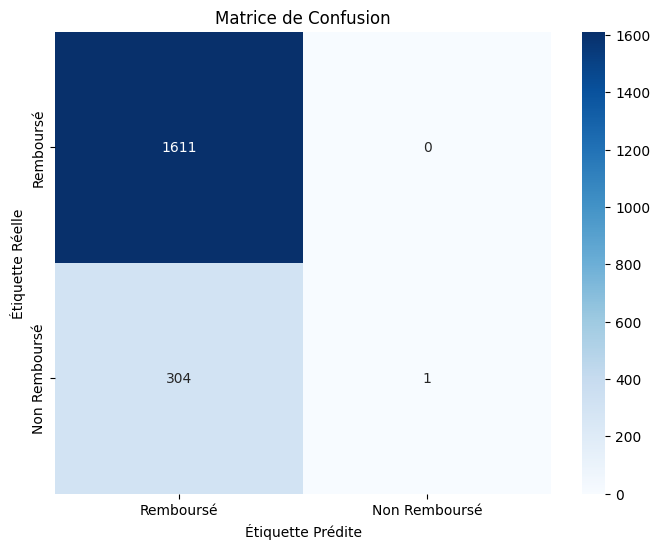

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Remboursé", "Non Remboursé"], yticklabels=["Remboursé", "Non Remboursé"])

plt.title("Matrice de Confusion")
plt.ylabel("Étiquette Réelle")
plt.xlabel("Étiquette Prédite")
plt.show()

In [68]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       1.00      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.92      0.50      0.46      1916
weighted avg       0.87      0.84      0.77      1916



In [95]:
from collections import Counter

under = RandomUnderSampler(sampling_strategy=0.95)

df_encodedX1, df_encodedY1 = under.fit_resample(df_encodedX, df_encodedY)



In [96]:
df_encodedY1

0       0
1       0
2       0
3       0
4       0
       ..
3141    1
3142    1
3143    1
3144    1
3145    1
Name: not.fully.paid, Length: 3146, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_encodedX1, df_encodedY1, test_size=0.2, random_state=42)


In [98]:
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'Précision : {precision}')
print(f'Recall : {recall}')
print(f'Précision globale : {accuracy}')

# Afficher la matrice de confusion
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matrice de confusion :\n', conf_matrix)

Précision : 0.56
Recall : 0.5773195876288659
Précision globale : 0.5952380952380952
Matrice de confusion :
 [[207 132]
 [123 168]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.61      0.62       339
           1       0.56      0.58      0.57       291

    accuracy                           0.60       630
   macro avg       0.59      0.59      0.59       630
weighted avg       0.60      0.60      0.60       630



In [100]:
cm = confusion_matrix(y_test, y_pred)

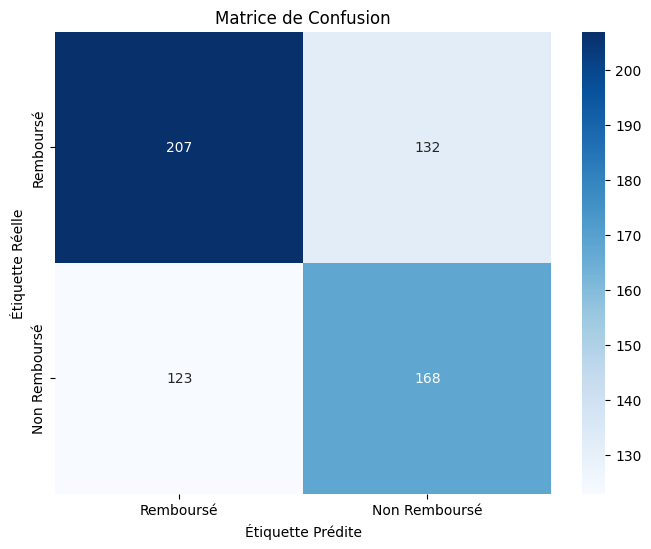

In [101]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Remboursé", "Non Remboursé"], yticklabels=["Remboursé", "Non Remboursé"])

plt.title("Matrice de Confusion")
plt.ylabel("Étiquette Réelle")
plt.xlabel("Étiquette Prédite")
plt.show()